In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [31]:
x = np.arange(500)
sigma = 20
mu = 250
samplerate = 1 # 1 sample per second
g = 1 / np.sqrt(1 * np.pi * sigma**2) * np.exp(-(x-mu)**2 / 2 / sigma**2)

plt.figure()
plt.plot(x, g)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


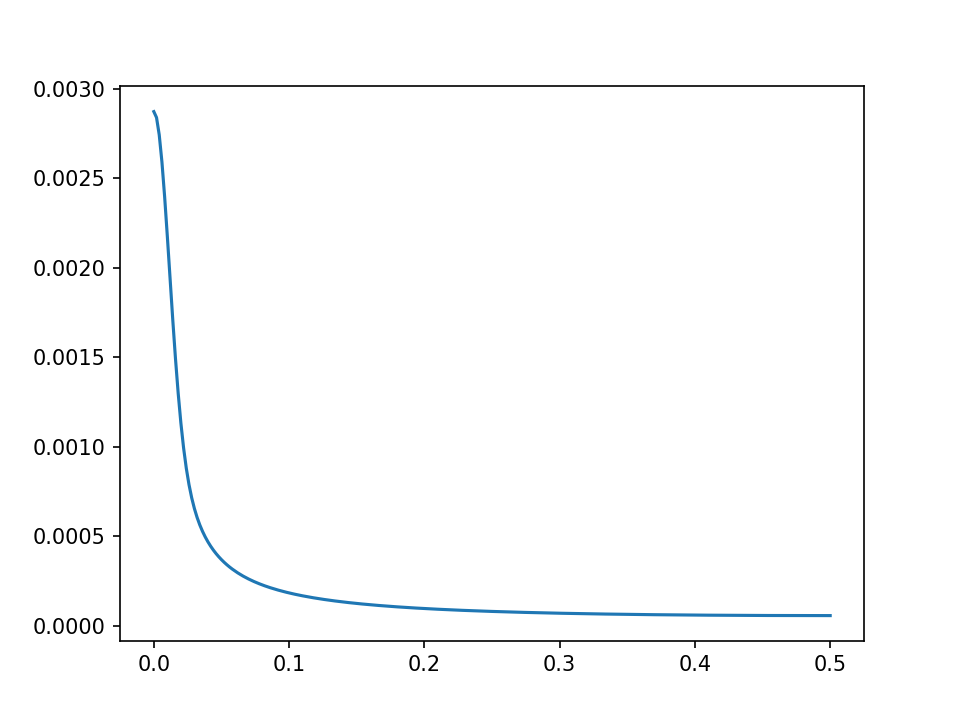

<IPython.core.display.Javascript object>


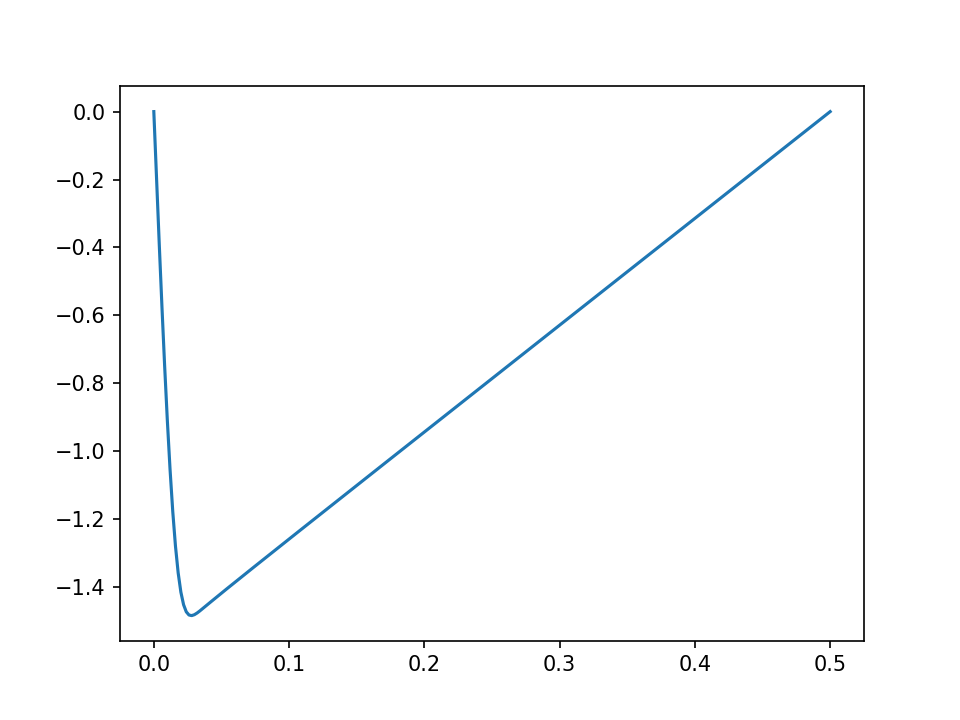

In [16]:
# Note: you can zero pad g (or increase number of samples) to get better 
# freq resolution if you need
G = np.fft.rfft(g) # real Fast Fourier Transform
amps = np.abs(G) / G.size # amplitudes
phase = np.angle(G) # phase angle
freqs = np.arange(G.size) * samplerate / g.size # convert from wave number to real frequencies

plt.figure()
plt.plot(freqs, amps)

plt.figure()
plt.plot(freqs, phase)

<IPython.core.display.Javascript object>


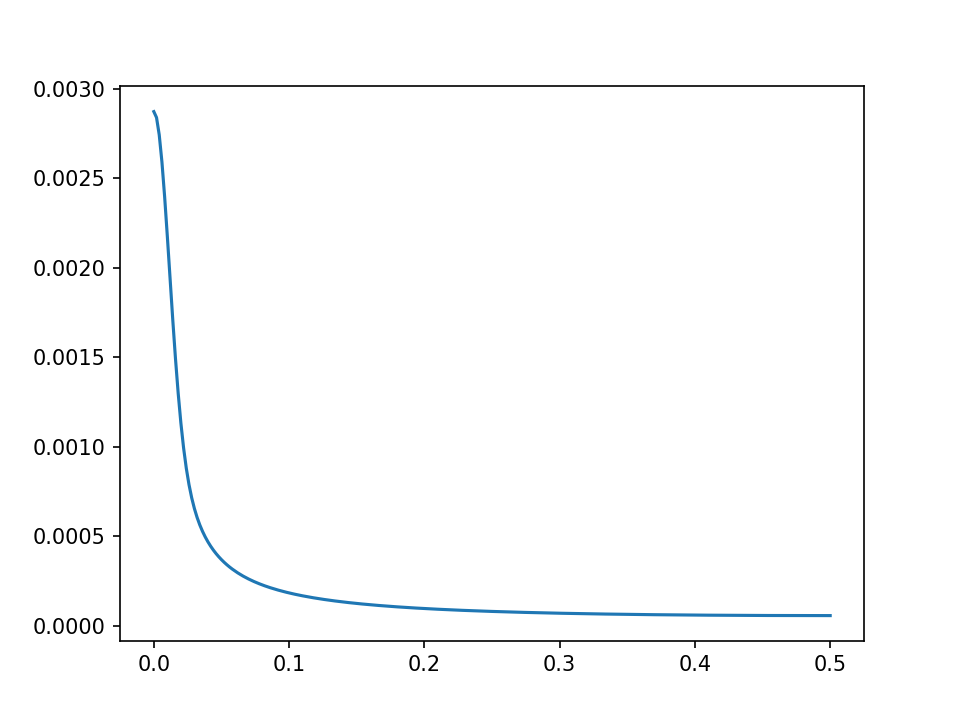

<IPython.core.display.Javascript object>


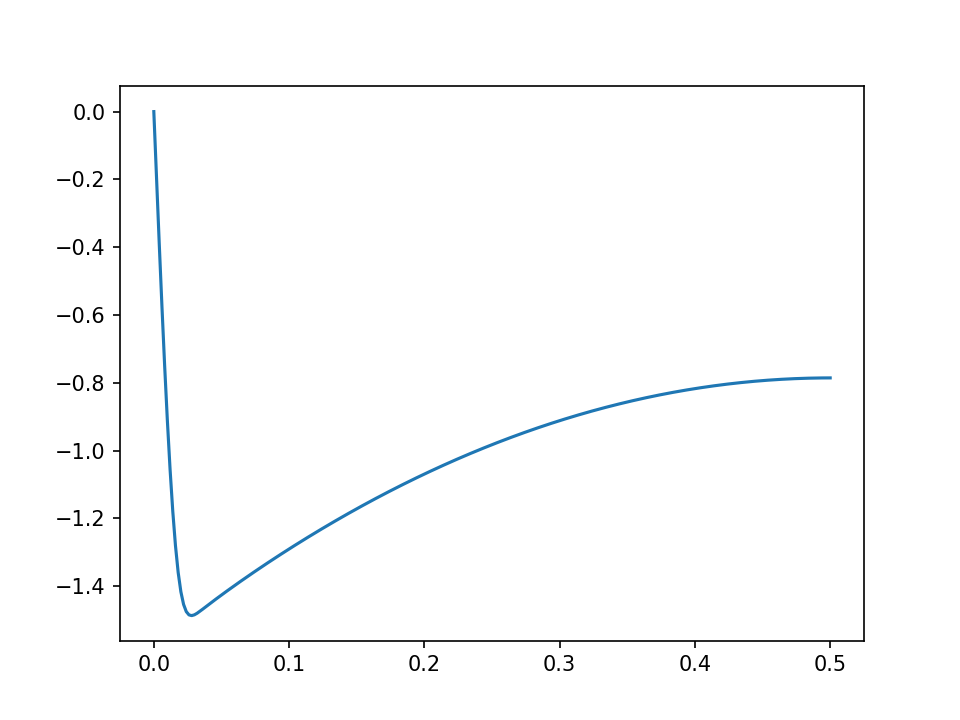

In [29]:
# make quadratic phase shift
wavenumber = np.arange(G.size)
complexExponent = -2j * np.pi * wavenumber**2 / g.size * 1e-3

phaseAltered = G * np.exp(complexExponent)

plt.figure()
plt.plot(freqs, np.abs(phaseAltered) / G.size)

plt.figure()
plt.plot(freqs, np.angle(phaseAltered))

<IPython.core.display.Javascript object>


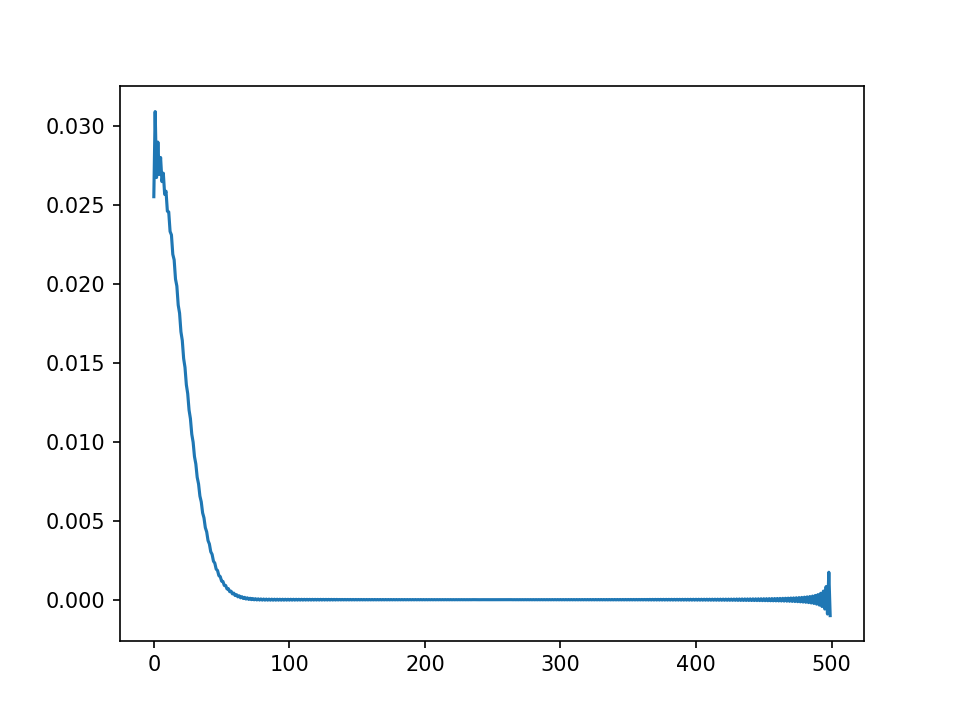

In [30]:
# inverse tranform
inverse = np.fft.irfft(phaseAltered)

plt.figure()
plt.plot(x, inverse)

<IPython.core.display.Javascript object>


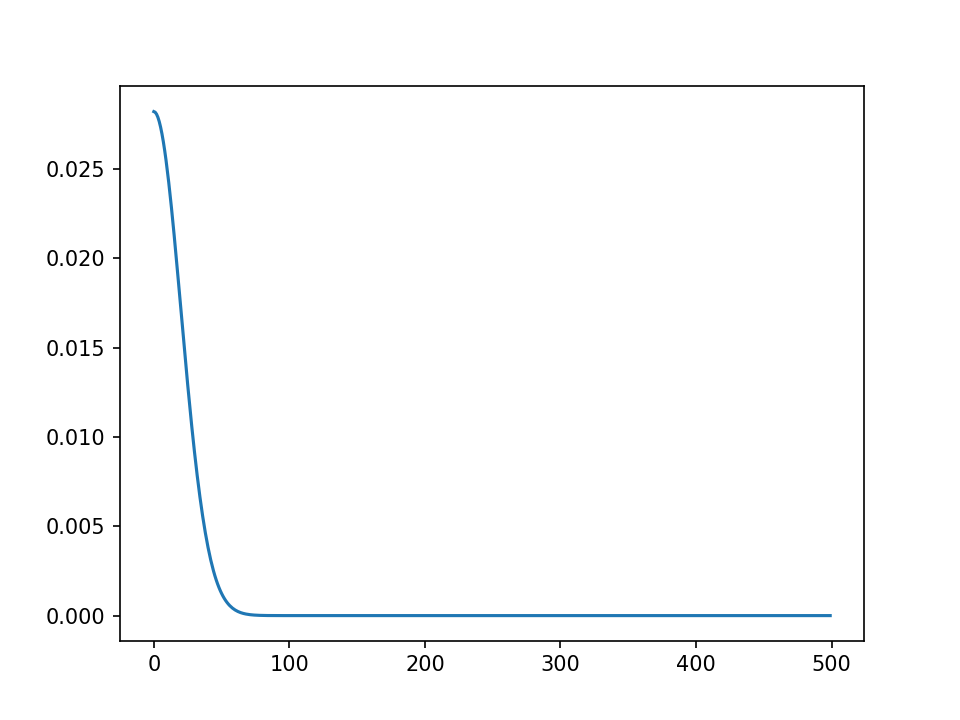

In [26]:
# inverse tranform
inverse = np.fft.irfft(G)

plt.figure()
plt.plot(x, inverse)